In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline


DOMAIN_1 = (-1,1)
DOMAIN_2 = [0, 2*np.pi]

In [41]:
def f_1(x):
    return 1 / (1 + 25 * x ** 2)

def f_2(x):
    return np.exp(np.cos(x))


#### Wyznacz wielomiany interpolujące funkcje: $f_1(x)$ na przedziale [−1, 1] , $f_2(x)$ na przedziale [0, 2π] używając:


##### wielomianów Lagrange’a z równoodległymi węzłami

$x_j = x_0+jh, j = 0, 1, . . . , n, \text{gdzie } h = (x_n − x_0)/n$


##### kubicznych funkcji sklejanych z równoodległymi węzłami

$x_j = x_0+jh, j = 0, 1, . . . , n, \text{gdzie } h = (x_n − x_0)/n$



##### wielomianów Lagrange’a z węzłami Czebyszewa

$
\begin{equation}
    x_j = cos(\theta_j) \text{    } \theta_j = \frac{2j + 1} {2(n + 1)} π, \text{ }0 ≤ j ≤ n
\end{equation}
$

In [42]:
def h_value(domain, n):
    return (domain[1]-domain[0])/n

def equispaced_nodes(domain, n):
    return np.arange(n+1)*h_value(domain, n) + domain[0]

def chebyshev_nodes(domain, n):
    return ((np.cos((2 * np.arange(n+1) + 1) * np.pi / (2 * (n + 1))) + 1 ) / 2) * (domain[1] - domain[0]) + domain[0]

def lagrange_interpolation(x, y, t):
    n = len(x)
    L = 0
    for i in range(n):
        l = 1
        for j in range(n):
            if j != i:
                l *= (t - x[j]) / (x[i] - x[j])
        L += y[i] * l
    return L

##### a)
Dla funkcji Rungego, $f_1(x)$, z $n$ = 12 węzłami interpolacji przedstaw na wspólnym wykresie funkcję $f_1(x)$ oraz wyznaczone wielomiany interpolacyjne i funkcję sklejaną. W celu stworzenia wykresu wykonaj próbkowanie funkcji $f_1(x)$ i wielomianów interpolacyjnych na 10 razy gęstszym zbiorze (próbkowanie jednostajne w x dla węzłów równoodległych, jednostajne w θ dla węzłów Czebyszewa). Pamiętaj o podpisaniu wykresu i osi oraz o legendzie.

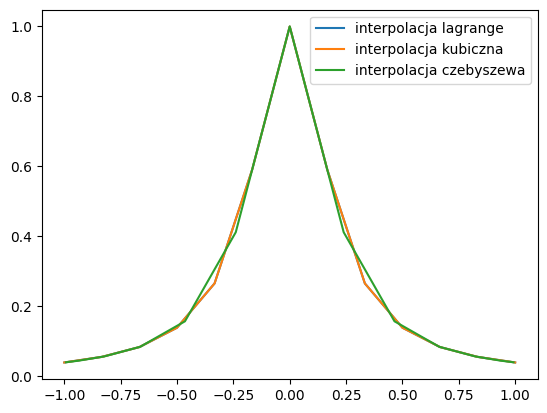

In [61]:
eq_nodes = equispaced_nodes(DOMAIN_1, 12)
chbshv_nodes = chebyshev_nodes(DOMAIN_1, 12)

runge_lagrange = lagrange_interpolation(eq_nodes, f_1(eq_nodes), eq_nodes)
runge_cubic = CubicSpline(eq_nodes, f_1(eq_nodes))
runge_chebyshev = lagrange_interpolation(chbshv_nodes, f_1(chbshv_nodes), chbshv_nodes)

fig, ax = plt.subplots()
ax.plot(eq_nodes, runge_lagrange, label="interpolacja lagrange")
ax.plot(eq_nodes, runge_cubic(eq_nodes), label = "interpolacja kubiczna")
ax.plot(chbshv_nodes, runge_chebyshev, label = "interpolacja czebyszewa")
plt.legend()
plt.show()


##### b)

Wykonaj interpolację funkcji $f_1(x)$ i $f_2(x)$ z $n$ = 4, 5, ..., 50 węzłami interpolacji, używając każdej z powyższych trzech metod interpolacji. Ewaluację funkcji, wielomianów interpolacyjnych oraz funkcji sklejanych przeprowadź na zbiorze 500 losowo wybranych punktów z dziedziny funkcji. Stwórz dwa rysunki, jeden dla $f_1(x)$, drugi dla $f_2(x)$. Na każdym rysunku przedstaw razem wykresy normy wektora błędów (czyli długości wektora) na tym zbiorze punktów w zależności od liczby węzłów interpolacji, n, dla każdej z trzech metod interpolacji.



Która metoda interpolacji jest najbardziej dokładna, a która najmniej?